<a href="https://colab.research.google.com/github/Hadrien-Cornier/cool-nn-stuff/blob/main/gpt2_reproduction_karp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.youtube.com/watch?v=l8pRSuU81PU&t=3359s

$12$ layers in the transformer

$D=768$ hidden dimension

transformer equation
: $(QK^T)V$

$Q,K,V$ in $R^{S \times D}$

In [10]:
# Uncomment if needed
# !conda install -c conda-forge transformers -y
# !conda install pytorch::pytorch torchvision torchaudio -c pytorch -y


Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.

Channels:
 - pytorch
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/hcornier/Documents/GitHub/cool-nn-stuff/.conda

  added / updated specs:
    - pytorch::pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.6.2           |  py312hca03da5_0         162 KB
    freetype-2.12.1            |       hadb7bae_2         582 KB  conda-forge
    jinja2-3.1.4               |  py312hca03da5_0         349 KB
    lcms2-2.16                 |       ha0e7c42_0         207 KB  conda-forge
    lerc-4.0.0                 |       h9a09cb3_0         211 KB  conda-forge
    libblas-3.9.0              |1_h9886b1c_netlib         156 KB
    libcblas-3.9.0 

In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

/Users/hcornier/Documents/GitHub/cool-nn-stuff/.conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer_hf = GPT2Tokenizer.from_pretrained('gpt2')

sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

transformer.wte.weight torch.Size([50257, 768]) = Token Embedding matrix

transformer.wpe.weight torch.Size([1024, 768]) = Positional embedding matrix

position embedding :looks kind of like a sinusoid


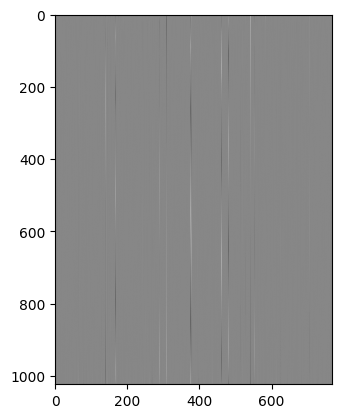

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray", interpolation="nearest")
print("position embedding :looks kind of like a sinusoid")

In [4]:
sd_hf["transformer.wpe.weight"]

tensor([[-1.8821e-02, -1.9742e-01,  4.0267e-03,  ..., -4.3044e-02,
          2.8267e-02,  5.4490e-02],
        [ 2.3959e-02, -5.3792e-02, -9.4879e-02,  ...,  3.4170e-02,
          1.0172e-02, -1.5573e-04],
        [ 4.2161e-03, -8.4764e-02,  5.4515e-02,  ...,  1.9745e-02,
          1.9325e-02, -2.1424e-02],
        ...,
        [-1.7987e-03,  1.6052e-03, -5.5103e-02,  ...,  1.3617e-02,
         -7.1805e-03,  3.7552e-03],
        [ 3.2105e-03,  1.5501e-03, -4.8944e-02,  ...,  2.0725e-02,
         -1.1838e-02, -5.5683e-04],
        [ 2.6610e-04,  3.0272e-03, -1.7086e-03,  ..., -4.6506e-03,
         -2.3541e-03, -5.7855e-03]])

position embedding : 
 individual position embeddings, kind of like a sinusoid


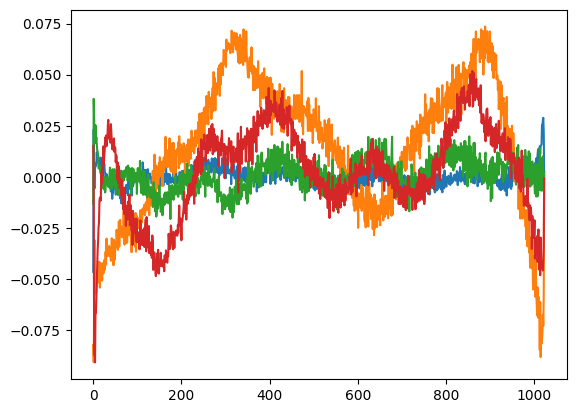

In [15]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 151])
plt.plot(sd_hf["transformer.wpe.weight"][:, 152])
plt.plot(sd_hf["transformer.wpe.weight"][:, 153])
print("position embedding : \n individual position embeddings, kind of like a sinusoid")

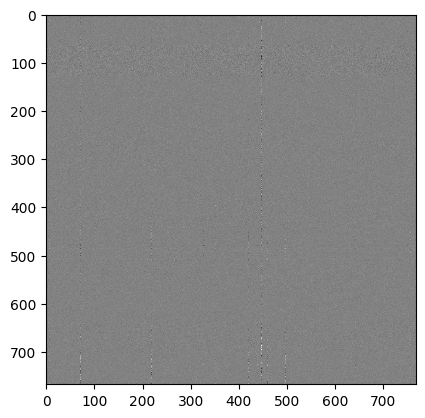

In [16]:
plt.imshow(sd_hf["transformer.h.2.attn.c_proj.weight"], cmap="gray", interpolation="nearest")

interesting how the hidden weights of the model seem to like making sinusoids in the hidden dimension 
 is information recorded as frequency ?


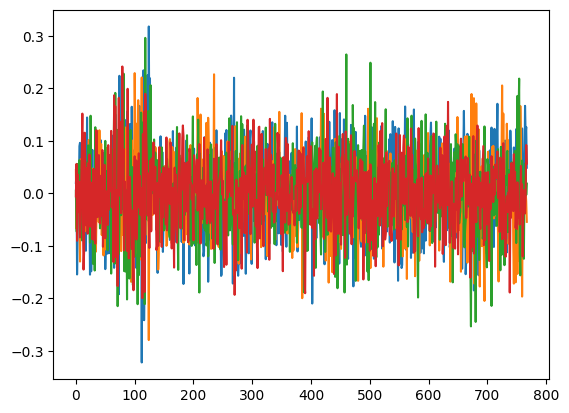

In [18]:
plt.plot(sd_hf["transformer.h.2.attn.c_proj.weight"][:, 150])
plt.plot(sd_hf["transformer.h.2.attn.c_proj.weight"][:, 151])
plt.plot(sd_hf["transformer.h.2.attn.c_proj.weight"][:, 152])
plt.plot(sd_hf["transformer.h.2.attn.c_proj.weight"][:, 153])
print("interesting how the hidden weights of the model seem to like making sinusoids in the hidden dimension \n is information recorded as frequency ?")

In [19]:
from transformers import pipeline, set_seed
generator = pipeline("text-generation", model="gpt2")
set_seed(42)
generator("Hello, I'm a language model", max_length=30, num_return_sequences=3)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language modeler. I'm fluent in several languages. I know a lot about each one, but I don't usually write"},
 {'generated_text': "Hello, I'm a language modeler, not a compiler and never got the time to learn this idea. I've also been working on my own"},
 {'generated_text': "Hello, I'm a language model, but there's so little interaction that those things get out of hand at different moments, so that has to be"}]

In [3]:
torch.randn(3,3)

tensor([[-0.2854,  1.3859, -1.6221],
        [ 0.0166, -0.5432, -0.2014],
        [-0.3553,  1.1336,  0.1099]])